In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.preprocess import *
from utils.model import *

# Read data

In [2]:
y = read_target_train()

# Preprocess data

In [3]:
X, X_test = read_preprocessed_data()

# Train catboost

In [4]:
from catboost import CatBoostRegressor

In [5]:
model_tst = CatBoostRegressor(iterations = 500, verbose = 50, depth = 3, random_state = config['random_state'], cat_features=get_cat_features_list(X), loss_function='MAE')
model_C = CatBoostRegressor(iterations = 500, verbose = 50, depth = 3, random_state = config['random_state'], cat_features=get_cat_features_list(X), loss_function='MAE')

In [6]:
model_tst.fit(X, y['TST'])

0:	learn: 23.6516422	total: 120ms	remaining: 59.7s
50:	learn: 18.6522370	total: 781ms	remaining: 6.87s
100:	learn: 17.2961875	total: 1.43s	remaining: 5.67s
150:	learn: 16.5263993	total: 2.08s	remaining: 4.82s
200:	learn: 15.8562281	total: 2.73s	remaining: 4.07s
250:	learn: 15.3130964	total: 3.41s	remaining: 3.38s
300:	learn: 14.8273560	total: 4.07s	remaining: 2.69s
350:	learn: 14.3591007	total: 4.73s	remaining: 2.01s
400:	learn: 13.9858571	total: 5.39s	remaining: 1.33s
450:	learn: 13.6701721	total: 6.04s	remaining: 656ms
499:	learn: 13.3783003	total: 6.68s	remaining: 0us


In [7]:
model_C.fit(X, y['C'])

0:	learn: 0.0386563	total: 14.4ms	remaining: 7.19s
50:	learn: 0.0311469	total: 687ms	remaining: 6.04s
100:	learn: 0.0274317	total: 1.35s	remaining: 5.33s
150:	learn: 0.0237275	total: 2s	remaining: 4.63s
200:	learn: 0.0216954	total: 2.65s	remaining: 3.95s
250:	learn: 0.0210527	total: 3.31s	remaining: 3.28s
300:	learn: 0.0203105	total: 3.97s	remaining: 2.62s
350:	learn: 0.0199431	total: 4.62s	remaining: 1.96s
400:	learn: 0.0196582	total: 5.28s	remaining: 1.3s
450:	learn: 0.0193476	total: 5.93s	remaining: 645ms
499:	learn: 0.0191347	total: 6.58s	remaining: 0us


In [8]:
save_catboost_models(model_tst, model_C)

<BarContainer object of 15 artists>

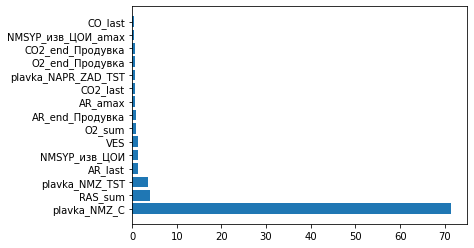

In [9]:
args = model_C.feature_importances_.argsort()[::-1][:15]
plt.barh(np.array(model_C.feature_names_)[args], model_C.feature_importances_[args]) 


<BarContainer object of 15 artists>

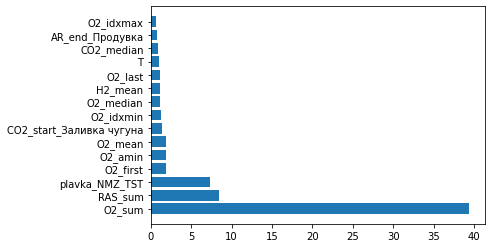

In [11]:
args = model_tst.feature_importances_.argsort()[::-1][:15]
plt.barh(np.array(model_tst.feature_names_)[args], model_tst.feature_importances_[args]) 

### Model Validation

In [59]:
from catboost import Pool, cv

cv_data = X

labels = y['TST']

cat_features = get_cat_features_list(X)

cv_dataset = Pool(data=cv_data,
                  label=labels,
                  cat_features=cat_features)

params = {"iterations": 1200,
          "depth": 3,
          "loss_function": "MAE",
          'grow_policy': 'Lossguide',
          "verbose": 50}

scores = cv(cv_dataset,
            params,
            fold_count=4,
            plot="True")

Custom logger is already specified. Specify more than one logger at same time is not thread safe.

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 1599.5834510	test: 1599.6304130	best: 1599.6304130 (0)
50:	learn: 346.9981061	test: 347.3661793	best: 347.3661793 (50)
100:	learn: 74.4867882	test: 74.8809454	best: 74.8809454 (100)
150:	learn: 24.5047020	test: 25.3216333	best: 25.3216333 (150)
200:	learn: 17.3811731	test: 18.7497675	best: 18.7497675 (200)
250:	learn: 15.6541971	test: 17.5896800	best: 17.5896800 (250)
300:	learn: 14.5829770	test: 17.1217139	best: 17.1217139 (300)	total: 34.2s	remaining: 1m 42s
350:	learn: 13.7762880	test: 16.8494539	best: 16.8494539 (350)
400:	learn: 13.1426713	test: 16.6421113	best: 16.6421113 (400)
450:	learn: 12.6309103	test: 16.5105297	best: 16.5105297 (450)
500:	learn: 12.2130224	test: 16.4041090	best: 16.4041090 (500)
550:	learn: 11.8752608	test: 16.3308717	best: 16.3304839 (548)
600:	learn: 11.5418254	test: 16.2544516	best: 16.2544516 (600)
650:	learn: 11.2588215	test: 16.1963595	best: 16.1963595 (650)
700:	learn: 11.0069660	test: 16.1398686	best: 16.1398686 (700)
750:	learn: 10.785562

In [50]:
from catboost import Pool, cv

cv_data = X

labels = y['C']

cat_features = get_cat_features_list(X)

cv_dataset = Pool(data=cv_data,
                  label=labels,
                  cat_features=cat_features)

params = {"iterations": 1200,
          "depth": 4,
#           "l2_leaf_reg" : 4,
          "loss_function": "MAE",
          "verbose": 50}

scores = cv(cv_dataset,
            params,
            fold_count=4, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.0806784	test: 0.0806811	best: 0.0806811 (0)
50:	learn: 0.0388708	test: 0.0390668	best: 0.0390668 (50)
100:	learn: 0.0304531	test: 0.0310770	best: 0.0310770 (100)
150:	learn: 0.0261900	test: 0.0274867	best: 0.0274867 (150)
200:	learn: 0.0228071	test: 0.0250227	best: 0.0250227 (200)
250:	learn: 0.0203139	test: 0.0234344	best: 0.0234344 (250)
300:	learn: 0.0190515	test: 0.0228107	best: 0.0228107 (300)
350:	learn: 0.0183360	test: 0.0226265	best: 0.0226265 (350)
400:	learn: 0.0178160	test: 0.0224804	best: 0.0224788 (398)
450:	learn: 0.0174227	test: 0.0224245	best: 0.0224245 (450)
500:	learn: 0.0169999	test: 0.0223082	best: 0.0223066 (499)
550:	learn: 0.0166461	test: 0.0222499	best: 0.0222499 (550)
600:	learn: 0.0163142	test: 0.0222513	best: 0.0222445 (561)	total: 59.9s	remaining: 59.7s
650:	learn: 0.0160087	test: 0.0222088	best: 0.0222016 (639)
700:	learn: 0.0157426	test: 0.0221776	best: 0.0221776 (700)
750:	learn: 0.0154929	test: 0.0221343	best: 0.0221296 (748)
800:	learn: 0.01